## Análise RH

In [1]:
# Importando as bases
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importando base de treino
treino = pd.read_csv('C:\\Users\\wggso\\OneDrive\\Documentos\Data_Science\\Análise de RH\\train_LZdllcl.csv')  
treino   

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
# Importando base de teste
teste = pd.read_csv(r'C:\Users\wggso\OneDrive\Documentos\Data_Science\Análise de RH\test_2umaH9m.csv')
teste

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [4]:
treino.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Pelo o que vi, todas as colunas a princípio fazem sentido para o modelo<br>
Nesse caso vou começar tratando os valores nulos das colunas

In [5]:
# identificando valores nulos
treino.isnull().sum().sort_values(ascending=False).head(10)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
dtype: int64

In [6]:
teste.isnull().sum().sort_values(ascending=False).head(10)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
dtype: int64

#### previous_year_rating <br>
Avaliação do funcionário no ano anterio<br>
***Se o funcionário não tem uma avaliação, pode ser pq não tem tempo de casa suficiente, nesse caso vou substituir pela média***

In [7]:
# Identificaando a média da coluna
media_avaliacao = treino['previous_year_rating'].mean()

# substituindo os valores vazios pela média
treino['previous_year_rating'] = treino['previous_year_rating'].fillna(media_avaliacao)

teste['previous_year_rating'] = teste['previous_year_rating'].fillna(media_avaliacao)

# Verificando se ficaram valores nulos
treino.isnull().sum().sort_values(ascending=False).head(10)

education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
dtype: int64

#### education <br>
Nível de educação<br>
***Se o nível de educação do funcionário é vazio, possivelmente esqueceu de preencher ou não possui, vou avaliar***

In [8]:
# Identificando cardinalidade da coluna
treino['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [9]:
# Identificando a moda
treino['education'].mode()

0    Bachelor's
Name: education, dtype: object

Não posso colocar como a moda, pois a moda é considerado um nível de estudo alto,<br>
nesse caso vou considerar como ***Below Secondary***, pois é o nível mais baixo.

In [10]:
# Substituindo valores vazios pelo  'Below Secondary'
treino['education'] = treino['education'].fillna('Below Secondary')

teste['education'] = teste['education'].fillna('Below Secondary')

# Verificando se ficaram valores nulos
treino.isnull().sum().sort_values(ascending=False).head(10)

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
dtype: int64

#### Agora vou tratar as colunas com cardinalidade alta

In [11]:
# identificando cardinalidade das colunas
treino.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [12]:
# Remover coluna 'employee_id'
treino = treino.drop('employee_id', axis=1)

treino

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Below Secondary,m,sourcing,1,29,1.0,2,0,0,45,0


Aplicando One-Hot Encoding

In [13]:
# Coluanas bool
# Criando dicionário
val_bool = {'f':0 , 'm': 1}

# Aplicando o dicionário na coluna
treino['gender'] = treino['gender'].replace(val_bool)

teste['gender'] = teste['gender'].replace(val_bool)

treino.dtypes

department               object
region                   object
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
# Colunas Object
treino = pd.get_dummies(treino, columns=['department', 'region', 'recruitment_channel', 'education' ], dtype=int)

teste = pd.get_dummies(teste, columns=['department', 'region', 'recruitment_channel', 'education' ], dtype=int)

#### Treinamento do modelo

In [15]:
# Separando o X e Y
X = treino.drop(['is_promoted'], axis=1)
y = treino.is_promoted

In [16]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

*usando árvore de validação*

In [17]:
#Criando o classificador
modelo_ac = tree.DecisionTreeClassifier(random_state=42)

#fazendo os fit com os dados
modelo_ac = modelo_ac.fit(X_train, y_train)

#criando a previsão
y_predict_ac = modelo_ac.predict(X_test)

# verificando o F1 score
f1_score(y_test, y_predict_ac)

0.4322414900449582

In [18]:
# Verificando acurácia
accuracy_score(y_test, y_predict_ac)

0.9022502349753967

Usando o modelo na base de teste

In [19]:
#vamos precisar remover a coluna de PassengerId da base de teste
x_teste = teste.drop(['employee_id'], axis=1)

#utilizando o modelo de regresão logísitca na base de teste
y_predict = modelo_ac.predict(x_teste)

#criando coluna com a previsão na base de teste
teste['is_promoted'] = y_predict

#Selecionando somente as colunas is_promoted e employee_id da base de teste
base_envio = teste[['employee_id', 'is_promoted']]

#exportar para csv
base_envio.to_csv('resultado.csv', index=False)

Resultado da Acurácia 0.9, *um resultado excelente*<br>
porém o f1_score foi de 0.43 *não foi bom*

### Redes Neurais

Vou treinar redes neurais para buscar melhorar o f1_score

In [20]:
# importando bibliotecas
from sklearn.neural_network import MLPClassifier

In [21]:
# Iniciando rede neural
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# Fit dos dados
mlp_clf.fit(X_train, y_train)

# Setando y_predict
y_val_pred = mlp_clf.predict(X_test)

# Avaliando o modelo
f1_val = f1_score(y_test, y_val_pred)
accuracy_val = accuracy_score(y_test, y_val_pred)

f1_val, accuracy_val


c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.5042897998093422, 0.9425001382208216)

Acurácia: 0.94 (excelente)<br>
F1_score: 0.50 (baixo)

### Reamostragem dos dados (*oversampling*)

Esta técnica é particularmente útil quando estamos lidando com um conjunto de dados desbalanceado, onde uma classe é significativamente mais frequente do que a outra.

In [22]:
# Importar bibliotecas necessárias para oversampling e avaliação do modelo
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Avaliando o balanceamento da coluna 'is_promoted'
treino['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [24]:
# Separar as classes para oversampling
df_majority = treino[treino.is_promoted==0]
df_minority = treino[treino.is_promoted==1]

In [25]:
# Fazer o oversampling da classe minoritária
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),  
                                 random_state=42)

In [26]:
# Combinar a classe majoritária com a classe minoritária após o oversampling
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [27]:
# Separar as características e os rótulos
X_upsampled = df_upsampled.drop('is_promoted', axis=1)
y_upsampled = df_upsampled['is_promoted']

In [28]:
# Dividir os dados com amostragem aumentada em conjuntos de treinamento e validação
X_train_upsampled, X_val_upsampled, y_train_upsampled, y_val_upsampled = train_test_split(
    X_upsampled, y_upsampled, train_size=0.8, test_size=0.2, random_state=42)

In [29]:
# Treinar um modelo de Árvore de Decisão nos dados com amostragem aumentada
dt_clf_upsampled = DecisionTreeClassifier(random_state=42)
dt_clf_upsampled.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(random_state=42)

In [30]:
# Fazer previsões no conjunto de validação
y_val_pred_upsampled = dt_clf_upsampled.predict(X_val_upsampled)

In [31]:
# Avaliar o modelo usando F1 Score e Acurácia
f1_val_upsampled = f1_score(y_val_upsampled, y_val_pred_upsampled)
accuracy_val_upsampled = accuracy_score(y_val_upsampled, y_val_pred_upsampled)

f1_val_upsampled, accuracy_val_upsampled

(0.9644006632205209, 0.9636019146390108)

### O modelo sofreu overffiting

Vou fazer alguns ajustes, para tentar resolver o problema ed overffiting

#### Validação Cruzada

In [32]:
from sklearn.model_selection import cross_val_score

# Definir o modelo que você quer usar
model = DecisionTreeClassifier(random_state=42)

# Executar validação cruzada
f1_scores = cross_val_score(model, X_upsampled, y_upsampled, scoring='f1', cv=5)

# Mostrar os resultados
print("F1 Scores:", f1_scores)
print("Média dos F1 Scores:", f1_scores.mean())


F1 Scores: [0.96557701 0.96427713 0.9656235  0.9655272  0.96921664]
Média dos F1 Scores: 0.9660442953085786


##### Utilizando outros modelos

LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split


# Dividir os dados em conjuntos de treinamento e validação
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(
    X_upsampled, y_upsampled, test_size=0.2, random_state=42
)

# Inicializar e treinar o modelo de Regressão Logística
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_log, y_train_log)

# Fazer previsões no conjunto de validação
y_val_pred_log = log_model.predict(X_val_log)

# Calcular F1 Score e acurácia
f1_val_log = f1_score(y_val_log, y_val_pred_log)
accuracy_val_log = accuracy_score(y_val_log, y_val_pred_log)

f1_val_log, accuracy_val_log

c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7667066826730692, 0.7674511368169127)

Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Inicializar e treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_log, y_train_log)

# Fazer previsões no conjunto de validação com o modelo Random Forest
y_val_pred_rf = rf_model.predict(X_val_log)

# Calcular F1 Score e acurácia para o modelo Random Forest
f1_val_rf = f1_score(y_val_log, y_val_pred_rf)
accuracy_val_rf = accuracy_score(y_val_log, y_val_pred_rf)

f1_val_rf, accuracy_val_rf

(0.984468339307049, 0.9844435580374951)

##### Hiperparametros

Descobrir os melhores paremetros (esse blovo pode demorar bastante)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir os parâmetros para a busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar o Grid Search com validação cruzada de 3 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='f1', verbose=2)

# Ajustar o Grid Search aos dados
grid_search.fit(X_upsampled, y_upsampled)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

best_params


In [36]:
# Inicializar o modelo Random Forest com os melhores hiperparâmetros
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Treinar o modelo otimizado no conjunto de treinamento
best_rf_model.fit(X_train_log, y_train_log)

# Fazer previsões no conjunto de validação com o modelo otimizado
y_val_pred_best_rf = best_rf_model.predict(X_val_log)

# Calcular F1 Score e acurácia para o modelo otimizado
f1_val_best_rf = f1_score(y_val_log, y_val_pred_best_rf)
accuracy_val_best_rf = accuracy_score(y_val_log, y_val_pred_best_rf)

f1_val_best_rf, accuracy_val_best_rf

(0.9846644094801833, 0.9846429996011169)

In [38]:
# Remover a coluna 'is_promoted' da base de teste, se ela existir
if 'is_promoted' in x_teste.columns:
    x_teste = x_teste.drop(['is_promoted'], axis=1)

# Fazer previsões
y_test_pred_best_rf = best_rf_model.predict(x_teste)

# Criar DataFrame para resultados
base_envio = pd.DataFrame({
    'employee_id': teste['employee_id'],
    'is_promoted': y_test_pred_best_rf
})

# Exportar para CSV
base_envio.to_csv('resultado3.csv', index=False)


Mesmo ajustando os hiperparemetros e usando validação cruzada<br>
o modelo teve um resultado de 0.41 na competição

##### Criando um DataFrame para visualizar os resultados

In [47]:
import matplotlib.pyplot as plt

# Definindo os dados de exemplo
data = {
    'Model': ['mlp_clf', 'modelo_ac', 'dt_clf_upsampled', 'best_rf_model'],
    'F1_Score': [0.50, 0.43, 0.96, 0.98],
    'Accuracy_Score': [0.94, 0.90, 0.96, 0.98]
}

# Criando o DataFrame
df = pd.DataFrame(data)

df

,Model,F1_Score,Accuracy_Score
0,mlp_clf,0.50,0.94
1,modelo_ac,0.43,0.90
2,dt_clf_upsampled,0.96,0.96
3,best_rf_model,0.98,0.98


In [48]:
# Dados da nova coluna "result_competition"
new_column_data = [0.48, 0.43, 0.41, 0.46]

# Atualizando os dados do DataFrame com a nova coluna
df['result_competition'] = new_column_data

df

,Model,F1_Score,Accuracy_Score,result_competition
0,mlp_clf,0.50,0.94,0.48
1,modelo_ac,0.43,0.90,0.43
2,dt_clf_upsampled,0.96,0.96,0.41
3,best_rf_model,0.98,0.98,0.46


Criando um gráfico para visualizar nosso desempenho

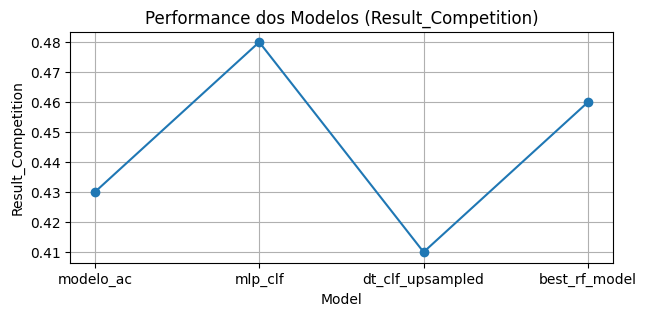

In [51]:
# Definindo a ordem específica para os modelos
custom_order = ['modelo_ac', 'mlp_clf', 'dt_clf_upsampled', 'best_rf_model']

# Reordenando o DataFrame com base na ordem específica
df_custom_order = df.set_index('Model').loc[custom_order].reset_index()

# Criando o gráfico de linha com pontos para a coluna "result_competition"
plt.figure(figsize=(7, 3))
plt.plot(df_custom_order['Model'], df_custom_order['result_competition'], marker='o', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Result_Competition')
plt.title('Performance dos Modelos (Result_Competition)')
plt.grid(True)
plt.show()



Nosso melhor modelo foi usando redes neurais<br>
mlp_clf	